In [1]:
#Import pandas and sqlite3 modules
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Create connections to the SQLite database
sqlite_database = ("database.sqlite")
connection = sqlite3.connect(sqlite_database)

In [3]:
#Retrieve data from Rate table
#Limit data to BusinessYear 2015 only (Otherwise a memory error will occur)
rate_data_2015_raw = pd.read_sql("""SELECT Distinct 
                            BusinessYear, 
                            StateCode, 
                            PlanId, 
                            RatingAreaId, 
                            Tobacco, 
                            Age, 
                            IndividualRate, 
                            IndividualTobaccoRate,
                            Couple, 
                            PrimarySubscriberAndOneDependent, 
                            PrimarySubscriberAndTwoDependents, 
                            PrimarySubscriberAndThreeOrMoreDependents,
                            CoupleAndOneDependent, 
                            CoupleAndTwoDependents, 
                            CoupleAndThreeOrMoreDependents
                            FROM Rate
                            WHERE BusinessYear='2015';""", connection)

In [4]:
#Display dimentionality of rate raw dataframe
rate_data_2015_raw.shape

(4585265, 15)

In [5]:
#Note the max individualrate is 9999.99. This is an aparent seudo number for those individualrate is not available.
#Any individualrate > 9000 need to be excluded from the dataframe
rate_data_2015_raw.describe()

,BusinessYear,IndividualRate
count,4585265.0,4.585265e+06
mean,2015.0,3.184029e+02
std,0.0,5.225669e+02
min,2015.0,0.000000e+00
25%,2015.0,2.815000e+01
50%,2015.0,2.779500e+02
75%,2015.0,4.573300e+02
max,2015.0,9.999990e+03


In [6]:
#We have 9360 rows of records with seudo numbers
rate_data_2015_raw[rate_data_2015_raw.IndividualRate > 9000]

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
182465,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,21,9999.00,,,,,,,,
182468,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,22,9999.00,,,,,,,,
182469,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,23,9999.00,,,,,,,,
182472,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,24,9999.00,,,,,,,,
182473,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,25,9999.00,,,,,,,,
182476,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,26,9999.00,,,,,,,,
182477,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,27,9999.00,,,,,,,,
182480,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,28,9999.00,,,,,,,,
182481,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,29,9999.00,,,,,,,,
182484,2015,AZ,86830AZ0050001,Rating Area 1,No Preference,30,9999.00,,,,,,,,


In [7]:
#Remove rows with seudo individualrate numbers
rate_data_2015_noseudo = rate_data_2015_raw[rate_data_2015_raw.IndividualRate<=9000]
rate_data_2015_noseudo.shape

(4575905, 15)

In [8]:
#Try to browse the dataframe to see if some columns have null values
rate_data_2015_noseudo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575905 entries, 0 to 4585264
Data columns (total 15 columns):
BusinessYear                                 int64
StateCode                                    object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        object
Couple                                       object
PrimarySubscriberAndOneDependent             object
PrimarySubscriberAndTwoDependents            object
PrimarySubscriberAndThreeOrMoreDependents    object
CoupleAndOneDependent                        object
CoupleAndTwoDependents                       object
CoupleAndThreeOrMoreDependents               object
dtypes: float64(1), int64(1), object(13)
memory usage: 558.6+ MB


In [9]:
#Exam StateCode in rate table.Total we have 37 states in Rate table
rate_data_2015_noseudo['StateCode'].value_counts().sort_index()

AK     37590
AL     58921
AR     32312
AZ    146629
DE      5899
FL    566635
GA    153030
IA     42498
IL    164562
IN    180410
KS     47671
LA     71026
ME     25202
MI    378900
MO     52006
MS     17526
MT     59304
NC    142852
ND     50920
NE     23716
NH      6844
NJ     38826
NM     15226
NV     16836
OH    358056
OK     69343
OR     40066
PA    118796
SC    643586
SD     33712
TN     64342
TX    316756
UT     32558
VA    100022
WI    382938
WV     58927
WY     21462
Name: StateCode, dtype: int64

In [10]:
#Exam Age column in Rate table. We need to remove 15586 rows with Age as "Family Option"
#Since we have age in 0-20 and above 65, we need to categorize age into different age groups.
rate_data_2015_noseudo['Age'].value_counts()

0-20             100909
52                99098
35                99098
36                99098
37                99098
30                99098
31                99098
32                99098
33                99098
38                99098
39                99098
41                99098
24                99098
40                99098
43                99098
42                99098
45                99098
44                99098
47                99098
46                99098
49                99098
48                99098
34                99098
25                99098
53                99098
26                99098
50                99098
51                99098
56                99098
57                99098
54                99098
55                99098
58                99098
59                99098
64                99098
63                99098
62                99098
61                99098
60                99098
29                99098
28                99098
23              

In [11]:
#Remove rows with Age as "Family Option"
rate_data_2015 = rate_data_2015_noseudo[rate_data_2015_noseudo.Age != 'Family Option']

In [12]:
#Display the dimension of rate_data_2015
rate_data_2015.shape

(4560319, 15)

In [13]:
#Retrive data from PlanAttributes table
#Limit data to BusinessYear 2015 only
plan_data_2015 = pd.read_sql("""SELECT Distinct 
                            PlanId,
                            MetalLevel
                            FROM PlanAttributes
                            WHERE BusinessYear='2015';""", connection)

In [14]:
#Display dimentionality of plan dataframe
plan_data_2015.shape

(31253, 2)

In [15]:
#Try to browse the plan dataframe to see if some columns have null values
plan_data_2015.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31253 entries, 0 to 31252
Data columns (total 2 columns):
PlanId        31253 non-null object
MetalLevel    31253 non-null object
dtypes: object(2)
memory usage: 488.4+ KB


In [16]:
#Generates descriptive statistics for plan dataframe
plan_data_2015.describe()

,PlanId,MetalLevel
count,31253,31253
unique,31253,7
top,35065IN0030007-02,Silver
freq,1,13021


In [17]:
#PlanId in plan_data_2015 has format of 73836AK0650002-01 (Standard Component and CSR Variant). 
#Create a new column called PlanIdNew and only keep the part before hyphen (Standard Component)
#Rate data only has Standard Component for PlanId 
plan_data_2015['PlanIdNew'] = plan_data_2015['PlanId'].str.split('-',expand=True)[0]

In [18]:
#Display Plan data with PlanIdNew Column which only has Standard Component
plan_data_2015.head(5)

,PlanId,MetalLevel,PlanIdNew
0,21989AK0030001-00,High,21989AK0030001
1,21989AK0030001-01,High,21989AK0030001
2,38344AK1020001-00,High,38344AK1020001
3,38344AK1020001-01,High,38344AK1020001
4,73836AK0750002-01,Gold,73836AK0750002


In [19]:
#Retrieve the PlanIdNew and MetalLevel columns from plan_data_2015, and remove duplicate rows
plan_data = plan_data_2015[['PlanIdNew','MetalLevel']]
plan_data_nodup = plan_data.drop_duplicates(keep='last')

In [20]:
#Display plan data with no duplicated rows
plan_data_nodup.head(5)

,PlanIdNew,MetalLevel
1,21989AK0030001,High
3,38344AK1020001,High
9,73836AK0710004,Silver
14,58670AK0010001,High
15,58670AK0010002,Low


In [21]:
#Merge two dataframe (rate_data_2015 and plan_data_nodup) into one dataframe (df_final)
df_final=pd.merge(rate_data_2015, plan_data_nodup, left_on='PlanId', right_on='PlanIdNew', how='left')

In [22]:
#Make sure every planid in Rate table is matched wtih planid in Plan table
df_final['PlanIdNew'].isnull().sum()

0

In [23]:
#Define a function cat_age to categorize ages into different age groups
def cat_age(age):
    #this function will assign different group based on input age
    if age=='0-20':
        return 'Group A'
    elif age in str(range(21,45)):
        return 'Group B'
    elif age in str(range(45, 65)):
        return 'Group C'
    else:
        return 'Group D'

In [24]:
#Add a new column called Age_Group, use cat_age function to assign age to different groups
df_final['Age_Group'] = df_final['Age'].apply(cat_age)

In [25]:
#Display df_final dataframe
display(df_final.head(5))

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,PlanIdNew,MetalLevel,Age_Group
0,2015,AK,21989AK0030001,Rating Area 1,No Preference,0-20,43.0,,,,,,,,,21989AK0030001,High,Group A
1,2015,AK,21989AK0030001,Rating Area 1,No Preference,21,38.0,,,,,,,,,21989AK0030001,High,Group B
2,2015,AK,21989AK0030001,Rating Area 1,No Preference,22,38.0,,,,,,,,,21989AK0030001,High,Group B
3,2015,AK,21989AK0030001,Rating Area 1,No Preference,23,38.0,,,,,,,,,21989AK0030001,High,Group B
4,2015,AK,21989AK0030001,Rating Area 1,No Preference,24,38.0,,,,,,,,,21989AK0030001,High,Group B


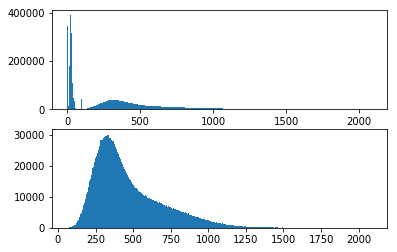

In [26]:
#Use Histgram to display frequency distribution of IndividualRate
#Since we do not exclude "High" and "Low" dental care MetalLevel, the lower rate becomes noise in the first plot
#If we exclude the dental care, we can see the medical care individualrate is slightly left skewed distributed.
plt.subplot(2, 1, 1)
plt.hist(x=df_final['IndividualRate'], bins='auto')

df_final_medonly = df_final[(df_final.MetalLevel!='High') & (df_final.MetalLevel!='Low')] #remove Dental plans
plt.subplot(2, 1, 2)
plt.hist(x=df_final_medonly['IndividualRate'], bins='auto')
plt.show()

In [27]:
#Print mean IndividualRate for each MetalLevel.
#High and Low MetalLevel are for dental care, other MetalLevel are for medical care.
#The mean IndividualRate increases in the order of Catastrophic, Bronze, Silver, Gold and Platium
df_final_medonly.groupby('MetalLevel')['IndividualRate'].mean()

MetalLevel
Bronze          370.980456
Catastrophic    275.194135
Gold            540.319575
Platinum        623.902263
Silver          457.906310
Name: IndividualRate, dtype: float64

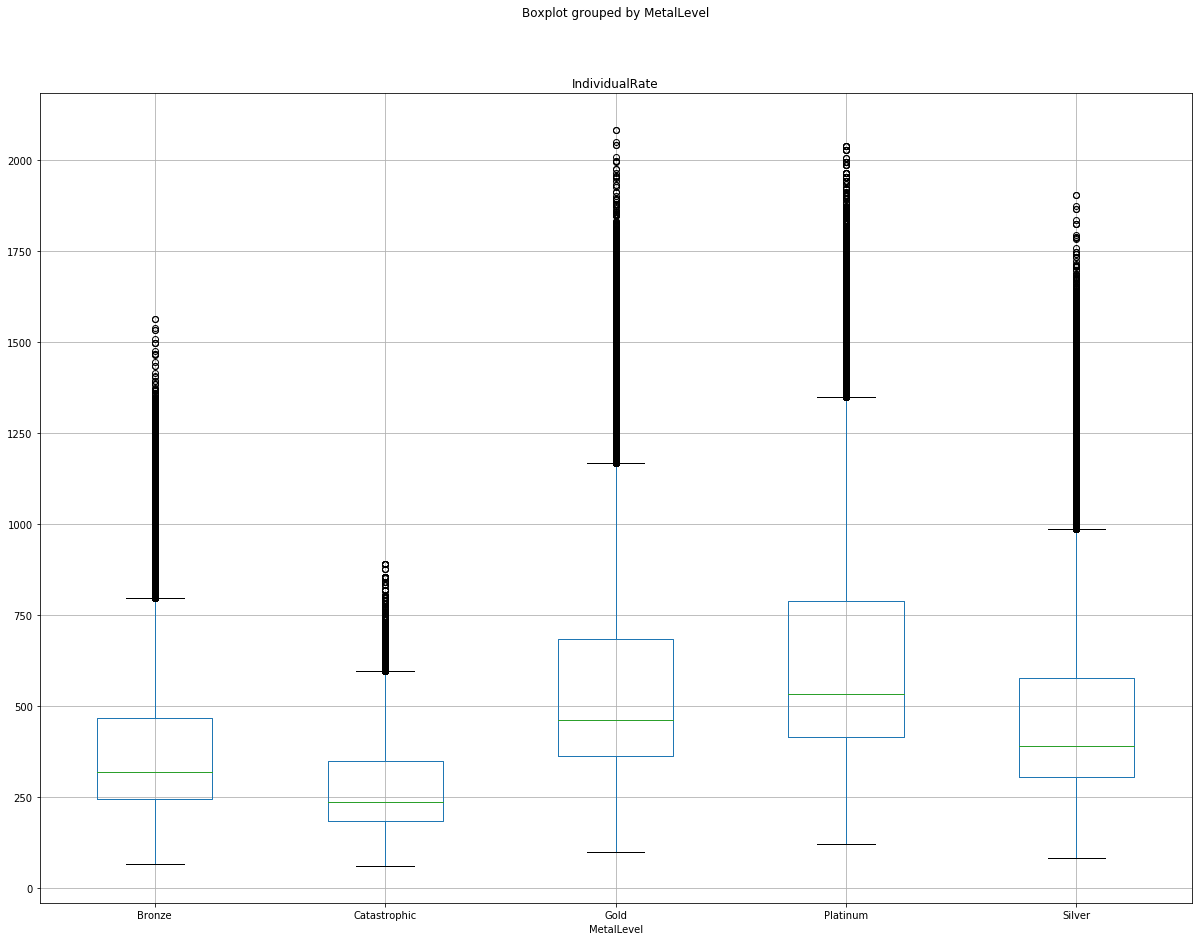

In [28]:
#Draw the BoxPlot for IndividualRate grouped by MetalLevel
plt.rcParams["figure.figsize"] = (20,15)
df_final_medonly.boxplot(column='IndividualRate',by='MetalLevel')

In [29]:
#Print mean IndividualRate for each StateCode.
df_final_medonly.groupby('StateCode')['IndividualRate'].mean()

StateCode
AK    709.912002
AL    380.933939
AR    392.231335
AZ    429.474395
DE    488.214460
FL    489.981767
GA    438.840647
IA    434.018604
IL    451.196345
IN    474.461905
KS    315.013346
LA    491.056915
ME    453.984419
MI    441.179073
MO    419.623737
MS    397.636666
MT    414.937273
NC    534.718744
ND    472.600111
NE    451.641556
NH    419.942788
NJ    514.164205
NM    325.117851
NV    424.899369
OH    469.222599
OK    397.797525
OR    335.621622
PA    431.436872
SC    482.101482
SD    443.039784
TN    486.052586
TX    441.025234
UT    329.551783
VA    413.692257
WI    522.997344
WV    564.055147
WY    592.305405
Name: IndividualRate, dtype: float64

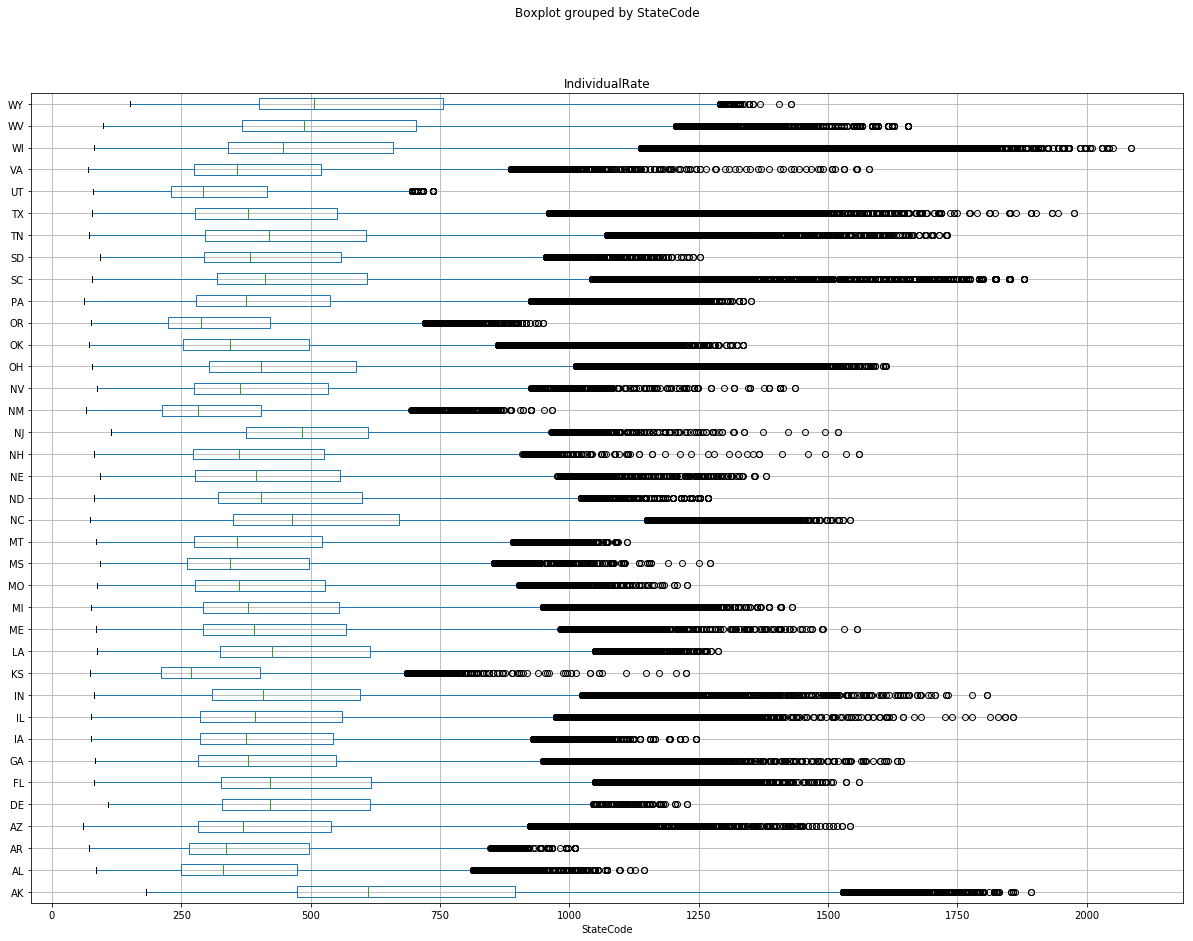

In [30]:
#Draw the BoxPlot for IndividualRate grouped by StateCode
df_final_medonly.boxplot(column='IndividualRate',by='StateCode', vert=False)

In [31]:
#Print mean IndividualRate for each Age_Group.
df_final_medonly.groupby('Age_Group')['IndividualRate'].mean()

Age_Group
Group A    180.998776
Group B    332.614528
Group C    626.783682
Group D    850.581704
Name: IndividualRate, dtype: float64

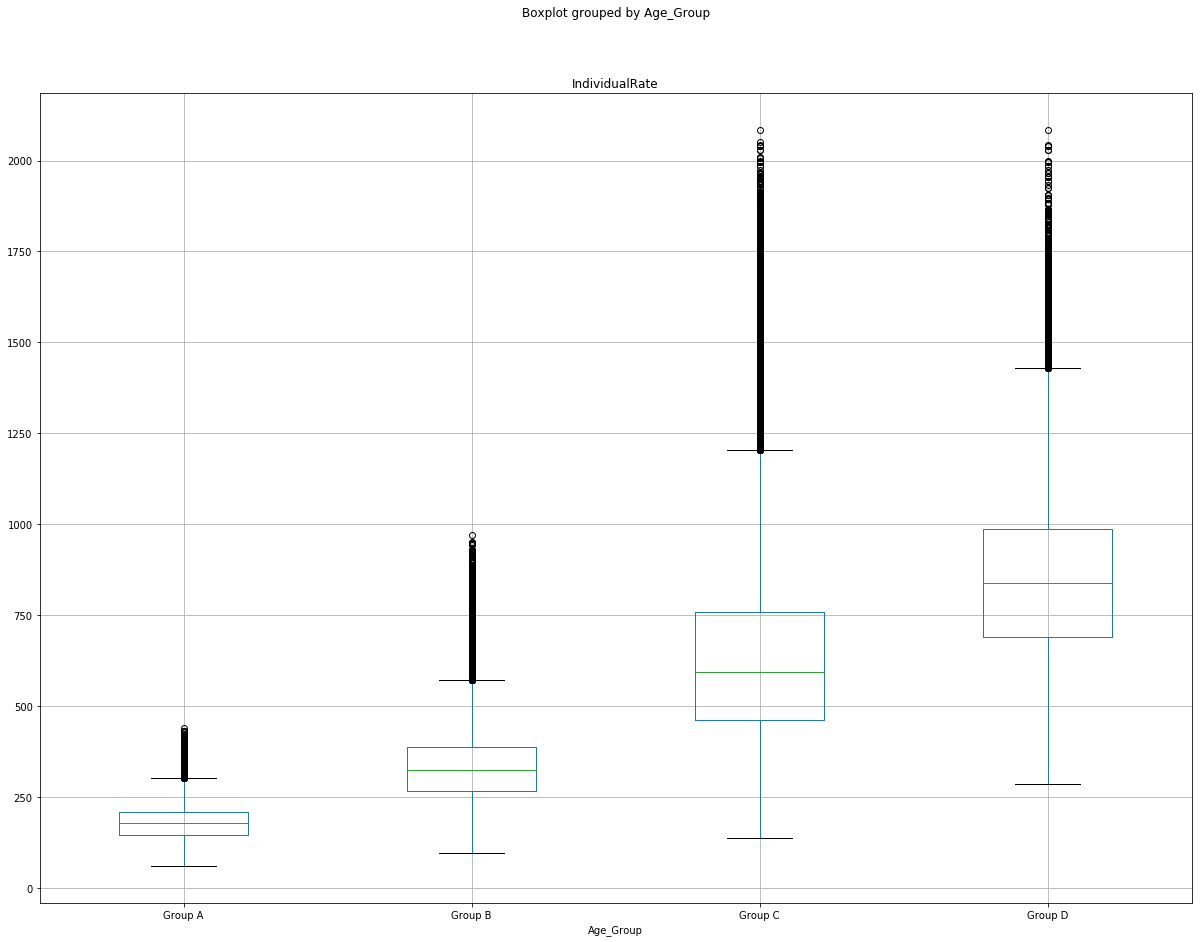

In [32]:
#Draw the BoxPlot for IndividualRate grouped by Age_Group
df_final_medonly.boxplot(column='IndividualRate',by='Age_Group')

In [33]:
#Take a deeper look at individualrates for specific age group and MetalLevel across states
#For Group A (people younger than 20) and Silver MetalLevel, I found two smallest sample means (KS and NM)
df_final_A = df_final_medonly[(df_final_medonly.Age_Group=='Group A') & (df_final_medonly.MetalLevel=='Silver')]
df_final_A.groupby('StateCode')['IndividualRate'].mean()

StateCode
AK    281.417196
AL    140.752424
AR    155.852321
AZ    159.733253
DE    184.184074
FL    179.155840
GA    171.373318
IA    168.022515
IL    174.720332
IN    188.428353
KS    123.685918
LA    182.596189
ME    179.581633
MI    165.563841
MO    168.731955
MS    165.039571
MT    158.673598
NC    196.428711
ND    173.934180
NE    182.435000
NH    162.631136
NJ    206.286725
NM    125.230769
NV    162.211342
OH    178.811328
OK    142.790186
OR    133.059102
PA    152.243592
SC    180.717962
SD    160.974087
TN    156.970256
TX    169.995569
UT    140.439760
VA    156.713706
WI    194.146770
WV    200.340727
WY    225.873148
Name: IndividualRate, dtype: float64

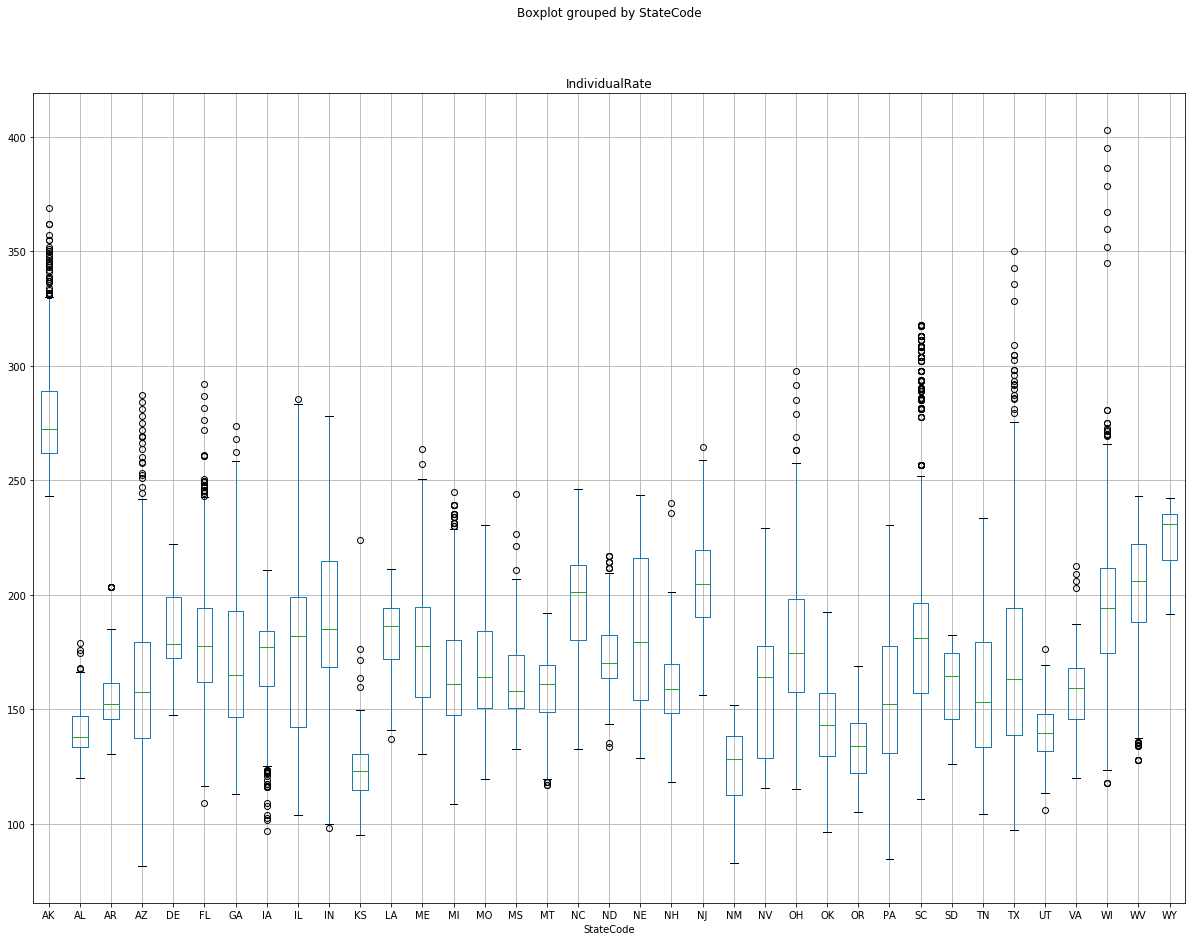

In [34]:
#Draw boxplot on individualrate for all Group A age under Silver plan cross 37 states. 
#KS and NM have the two smallest median values.
df_final_A.boxplot(column='IndividualRate',by='StateCode')

In [37]:
KS_data = df_final_A[df_final_A.StateCode=='KS']
print(KS_data.shape)
KS_mean = KS_data['IndividualRate'].mean()
print(KS_mean)

(267, 18)
123.68591760299626


In [39]:
NM_data = df_final_A[df_final_A.StateCode=='NM']
print(NM_data.shape)
NM_mean = NM_data['IndividualRate'].mean()
print(NM_mean)

(91, 18)
125.23076923076921
